# Read data

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
activity_cols = {
    "Datum": "date",
    "Ø Pace": "activity_pace_average",
    "Kalorien": "activity_calories",
    "Zeit": "activity_duration",
    "Ø Herzfrequenz": "activity_heart_rate_average",
    "Ø Atemfrequenz": "activity_breathing_rate_average",
}
df_activities = pd.read_csv(
    "data/raw/all_activities.csv",
    usecols=list(activity_cols.keys())
)
df_activities.rename(columns=activity_cols, inplace=True)

sleep_cols = {
    "Sleep Score 7 Tage": "date",
    "Score": "sleep_score",
    "Dauer": "sleep_duration",
    "Schlafenszeit": "sleep_bedtime",
    "Ruheherzfrequenz": "sleep_resting_heart_rate",
    "HFV-Status": "sleep_hrv_status",
    "Atmung": "sleep_breathing_rate",
    "Schlafbedürfnis": "sleep_duration_needed",
}
df_sleep = pd.read_csv(
    "data/raw/sleep.csv",
    usecols=list(sleep_cols.keys())
)
df_sleep.rename(columns=sleep_cols, inplace=True)


In [349]:
df_activities.head()

date activity_calories activity_duration activity_heart_rate_average activity_pace_average
0  2025-09-21 09:53:57             2,817          04:35:15                         148                  6:27
1  2025-09-20 15:18:50               246          00:20:13                         144                  5:26
2  2025-09-19 12:31:00               210          00:30:18                         116                  25.4
3  2025-09-15 11:16:13               350          00:30:39                         133                  5:28
4  2025-09-13 10:51:36               549          00:44:56                         144                  4:59

In [446]:
df_sleep.head()

date sleep_score sleep_resting_heart_rate sleep_breathing_rate sleep_hrv_status sleep_duration sleep_duration_needed sleep_bedtime
0  2025-09-30          77                       44                11.38               83       6h 47min               7h 0min      11:22 PM
1  2025-09-29          73                       46                   12               84        9h 6min              8h 40min      10:52 PM
2  2025-09-28          34                       47                14.96               84       6h 34min              7h 40min      12:34 AM
3  2025-09-27          93                       41                11.13               92       8h 32min              7h 40min      10:39 PM
4  2025-09-26          97                       42                11.15               90       7h 50min              7h 40min      10:07 PM

# Clean data/time features

In [ ]:
def pace_to_seconds(pace_str):
    try:
        if isinstance(pace_str, str) and ":" in pace_str:
            parts = pace_str.split(":")
            if len(parts) == 2:
                minutes, seconds = int(parts[0]), int(parts[1])
                return minutes * 60 + seconds
            elif len(parts) == 3:  # If format is HH:MM:SS
                hours, minutes, seconds = int(
                    parts[0]), int(parts[1]), int(parts[2])
                return hours * 3600 + minutes * 60 + seconds
        return float(pace_str)
    except Exception:
        return 0


df_activities["date"] = pd.to_datetime(df_activities["date"], errors="coerce")
df_activities["activity_time"] = df_activities["date"].dt.time

df_activities["date"] = df_activities["date"].dt.normalize()

df_activities["activity_time_seconds"] = df_activities["activity_time"].apply(
    lambda t: t.hour * 3600 + t.minute * 60 + t.second if isinstance(t, datetime.time) else 0
)

df_activities["activity_pace_average"] = df_activities["activity_pace_average"].apply(pace_to_seconds)

df_activities["activity_duration"] = pd.to_timedelta(df_activities["activity_duration"], errors="coerce")
df_activities["activity_duration_seconds"] = (
    df_activities["activity_duration"].dt.total_seconds().fillna(0).astype(int)
)

df_activities.head()


date activity_calories activity_duration activity_heart_rate_average  activity_pace_average activity_breathing_rate_average activity_time  activity_time_seconds  activity_duration_seconds
0 2025-09-21             2,817   0 days 04:35:15                         148                  387.0                              30      09:53:57                  35637                      16515
1 2025-09-20               246   0 days 00:20:13                         144                  326.0                              30      15:18:50                  55130                       1213
2 2025-09-19               210   0 days 00:30:18                         116                   25.4                              --      12:31:00                  45060                       1818
3 2025-09-15               350   0 days 00:30:39                         133                  328.0                              26      11:16:13                  40573                       1839
4 2025-09-13               549   0 days 00:44:56                         144                  299.0                              32      10:51:36                  39096                       2696

In [1]:
df_activities.dtypes

NameError: name 'df_activities' is not defined

In [507]:
numeric_columns = [
    "activity_calories",
    "activity_heart_rate_average",
    "activity_pace_average",
    "activity_duration_seconds",
    "activity_breathing_rate_average",
]

for col in numeric_columns:
    if df_activities[col].dtype == "object":
        df_activities[col] = pd.to_numeric(df_activities[col].str.replace(',', '').replace('--', '0'), errors='coerce')
    else:
        df_activities[col] = pd.to_numeric(df_activities[col], errors='coerce')

df_activities.head()

date  activity_calories activity_duration  activity_heart_rate_average  activity_pace_average  activity_breathing_rate_average activity_time  activity_time_seconds  activity_duration_seconds
0 2025-09-21               2817   0 days 04:35:15                          148                  387.0                               30      09:53:57                  35637                      16515
1 2025-09-20                246   0 days 00:20:13                          144                  326.0                               30      15:18:50                  55130                       1213
2 2025-09-19                210   0 days 00:30:18                          116                   25.4                                0      12:31:00                  45060                       1818
3 2025-09-15                350   0 days 00:30:39                          133                  328.0                               26      11:16:13                  40573                       1839
4 2025-09-13                549   0 days 00:44:56                          144                  299.0                               32      10:51:36                  39096                       2696

In [354]:
df_activities.dtypes

date                            datetime64[ns]
activity_calories                        int64
activity_duration              timedelta64[ns]
activity_heart_rate_average              int64
activity_pace_average                  float64
activity_time                           object
activity_time_seconds                    int64
activity_duration_seconds                int64
dtype: object

In [497]:
def bedtime_to_seconds(bedtime_str):
    try:
        t = pd.to_datetime(bedtime_str, format="%I:%M %p", errors="coerce")
        if pd.isnull(t):
            return 0
        return t.hour * 3600 + t.minute * 60 + t.second
    except Exception:
        return 0

df_sleep["sleep_bedtime_seconds"] = df_sleep["sleep_bedtime"].apply(bedtime_to_seconds)

df_sleep["date"] = pd.to_datetime(df_sleep["date"], errors="coerce")

df_sleep["sleep_duration"] = pd.to_timedelta(df_sleep["sleep_duration"], errors="coerce")
df_sleep["sleep_duration_seconds"] = (
    df_sleep["sleep_duration"].dt.total_seconds().fillna(0).astype(int)
)

df_sleep["sleep_duration_needed"] = pd.to_timedelta(df_sleep["sleep_duration_needed"], errors="coerce")
df_sleep["sleep_duration_needed_seconds"] = (
    df_sleep["sleep_duration_needed"].dt.total_seconds().fillna(0).astype(int)
)



In [498]:
numeric_columns = [
    "sleep_score",
    "sleep_duration_seconds",
    "sleep_duration_needed_seconds",
    "sleep_resting_heart_rate",
    "sleep_hrv_status",
    "sleep_breathing_rate",
]

for col in numeric_columns:
    if df_sleep[col].dtype == "object":
        df_sleep[col] = pd.to_numeric(df_sleep[col].str.replace(',', '').replace('--', '0'), errors='coerce')
    else:
        df_sleep[col] = pd.to_numeric(df_sleep[col], errors='coerce')

df_sleep["sleep_duration_needed_delta"] = df_sleep["sleep_duration_seconds"] - df_sleep["sleep_duration_needed_seconds"]
df_sleep.head()

date  sleep_score  sleep_resting_heart_rate  sleep_breathing_rate  sleep_hrv_status  sleep_duration sleep_duration_needed sleep_bedtime  sleep_bedtime_seconds  sleep_duration_seconds  sleep_duration_needed_seconds  sleep_duration_needed_delta
0 2025-09-30           77                        44                 11.38                83 0 days 06:47:00       0 days 07:00:00      11:22 PM                  84120                   24420                          25200                         -780
1 2025-09-29           73                        46                 12.00                84 0 days 09:06:00       0 days 08:40:00      10:52 PM                  82320                   32760                          31200                         1560
2 2025-09-28           34                        47                 14.96                84 0 days 06:34:00       0 days 07:40:00      12:34 AM                   2040                   23640                          27600                        -3960
3 2025-09-27           93                        41                 11.13                92 0 days 08:32:00       0 days 07:40:00      10:39 PM                  81540                   30720                          27600                         3120
4 2025-09-26           97                        42                 11.15                90 0 days 07:50:00       0 days 07:40:00      10:07 PM                  79620                   28200                          27600                          600

# Corelation Matrix sleep after training

In [499]:
df_latest_activity = df_activities.sort_values('activity_duration').groupby('date', as_index=False).last()

df_combined = pd.merge(df_latest_activity, df_sleep, on='date', how='right')
df_combined.count()

date                               365
activity_calories                  251
activity_duration                  251
activity_heart_rate_average        251
activity_pace_average              251
activity_breathing_rate_average    251
activity_time                      251
activity_time_seconds              251
activity_duration_seconds          251
sleep_score                        365
sleep_resting_heart_rate           365
sleep_breathing_rate               365
sleep_hrv_status                   365
sleep_duration                     364
sleep_duration_needed              364
sleep_bedtime                      365
sleep_bedtime_seconds              365
sleep_duration_seconds             365
sleep_duration_needed_seconds      365
sleep_duration_needed_delta        365
dtype: int64

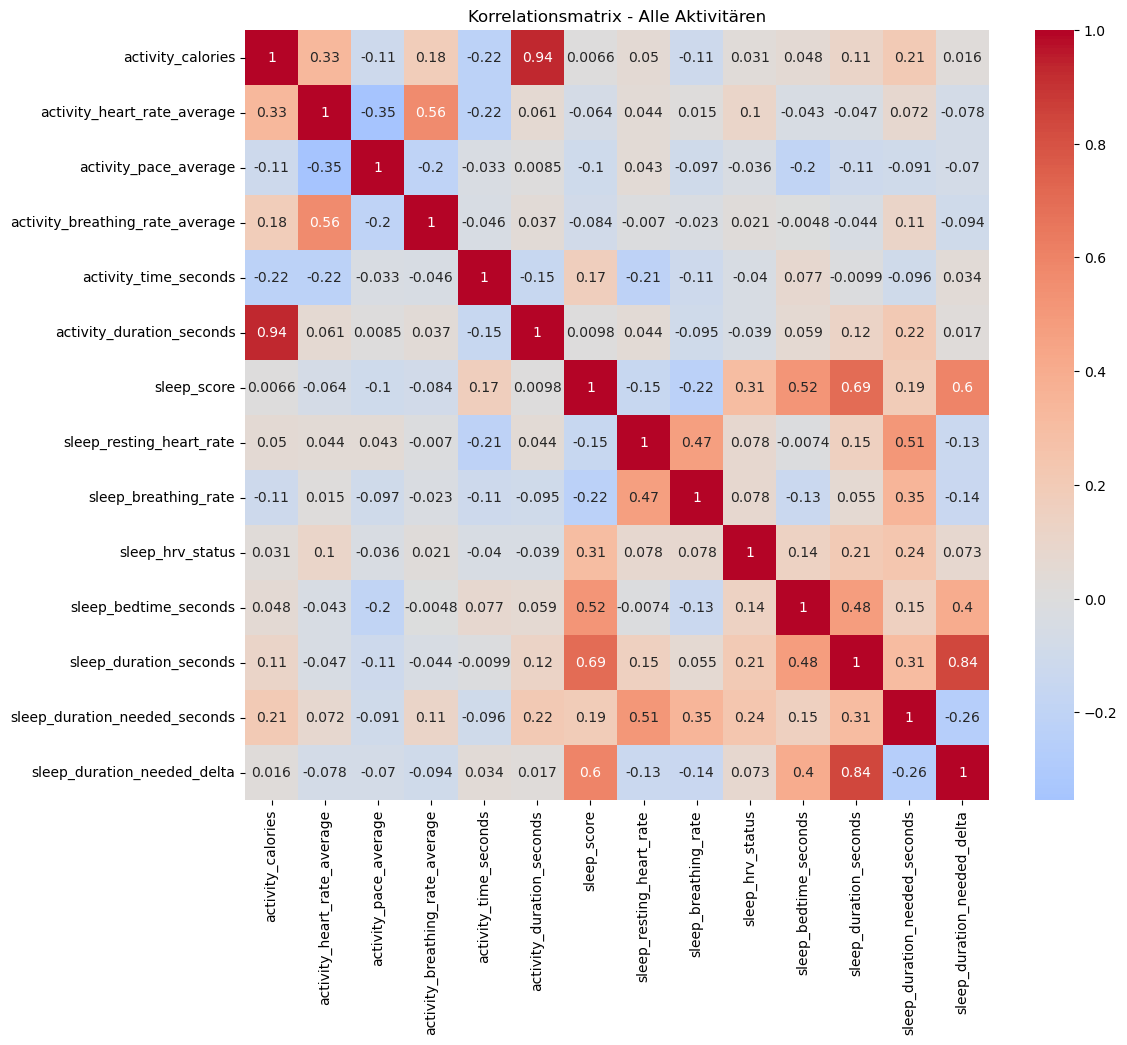

In [458]:
correlation_matrix = df_combined.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix - Alle Aktivitären")
plt.show()

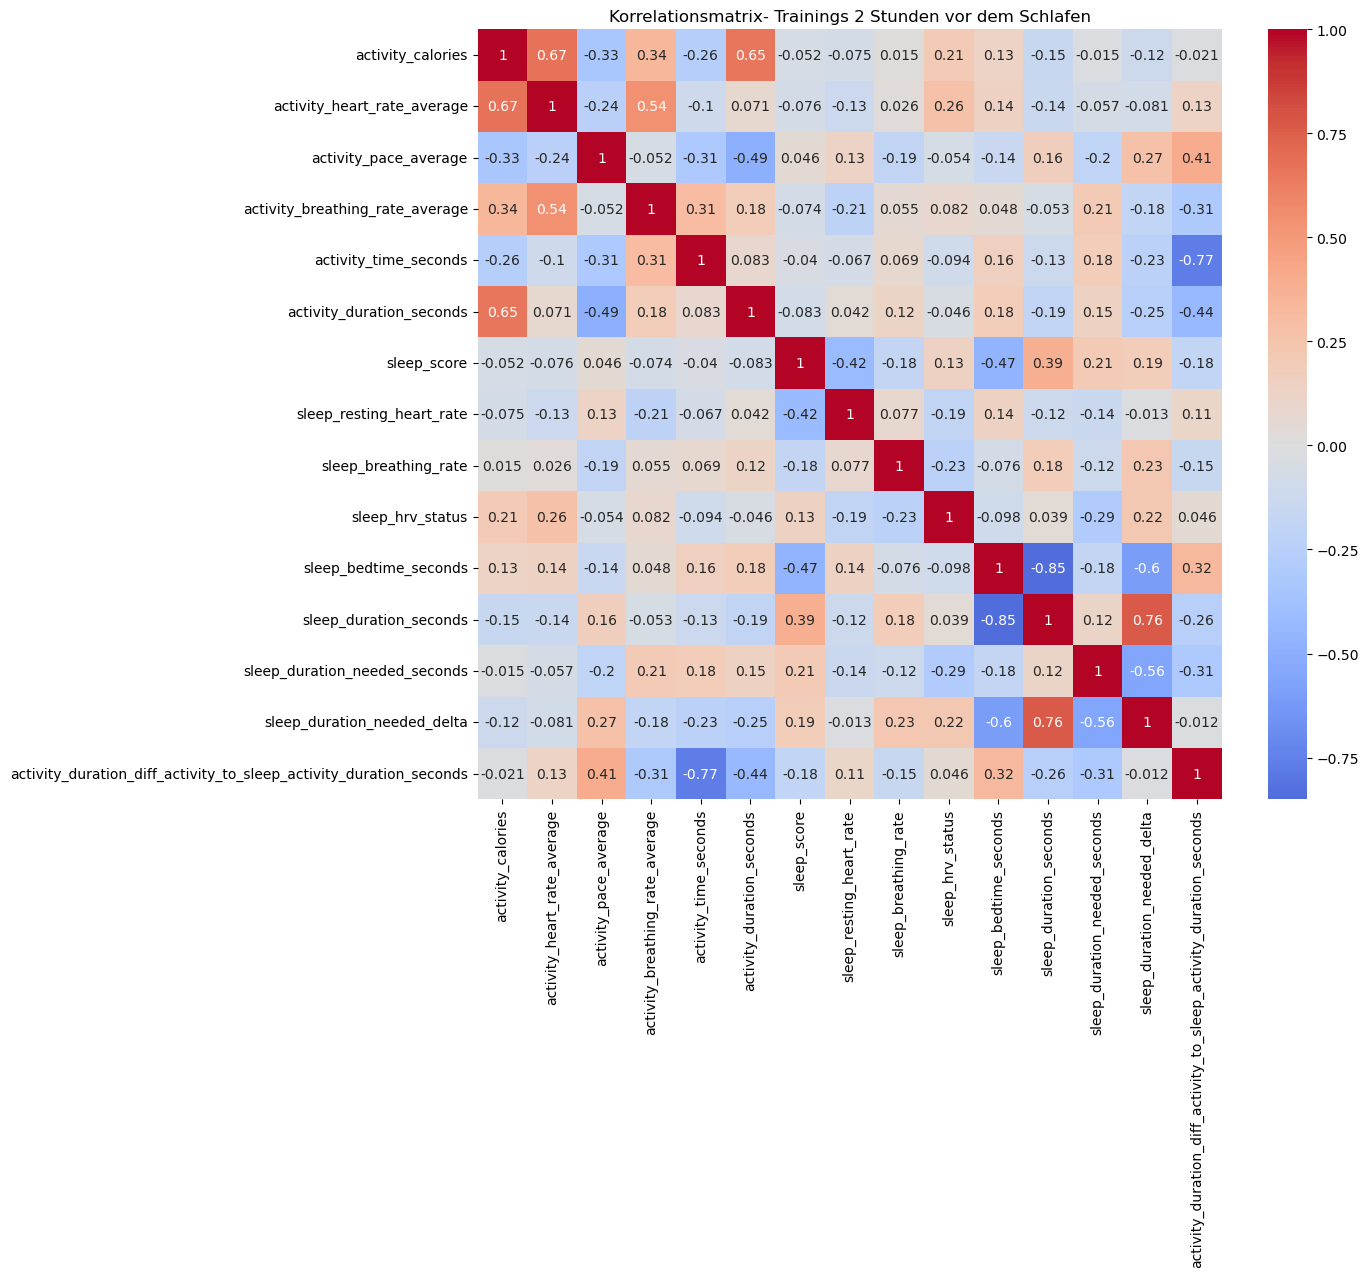

In [500]:
if "activity_duration_seconds" in df_combined.columns and "activity_time_seconds" in df_combined.columns and "sleep_bedtime_seconds" in df_combined.columns:
    df_combined["activity_duration_diff_activity_to_sleep_activity_duration_seconds"] = (
        df_combined["sleep_bedtime_seconds"] -
        df_combined["activity_time_seconds"] -
        df_combined["activity_duration_seconds"]
    )

filtered = df_combined[(df_combined["activity_duration_diff_activity_to_sleep_activity_duration_seconds"] < 4 * 60 * 60) & (df_combined["activity_duration_diff_activity_to_sleep_activity_duration_seconds"] > 0)]
# filtered = filtered.drop(
#     columns=["activity_duration_diff_activity_to_sleep_activity_duration_seconds"])

correlation_matrix = filtered.corr(numeric_only=True)


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix- Trainings 2 Stunden vor dem Schlafen")
plt.show()

In [309]:
len(filtered)

28

date  activity_calories activity_duration  activity_heart_rate_average  activity_pace_average  activity_breathing_rate_average activity_time  activity_time_seconds  activity_duration_seconds  sleep_score  sleep_resting_heart_rate  sleep_breathing_rate  sleep_hrv_status  sleep_duration sleep_duration_needed sleep_bedtime  sleep_bedtime_seconds  sleep_duration_seconds  sleep_duration_needed_seconds  sleep_duration_needed_delta  activity_duration_diff_activity_to_sleep_activity_duration_seconds
188 2025-03-26              896.0   0 days 02:13:14                        115.0                   24.2                             26.0      10:39:17                38357.0                     7994.0           66                        43                  12.0                77 0 days 08:40:00       0 days 08:40:00       9:44 PM                  78240                   31200                          31200                            0                                                             31889.0
248 2025-01-25              330.0   0 days 01:25:53                         80.0                  858.0                              0.0      14:30:54                52254.0                     5153.0           78                        45                  13.0                80 0 days 08:00:00       0 days 08:00:00      11:18 PM                  83880                   28800                          28800                            0                                                             26473.0

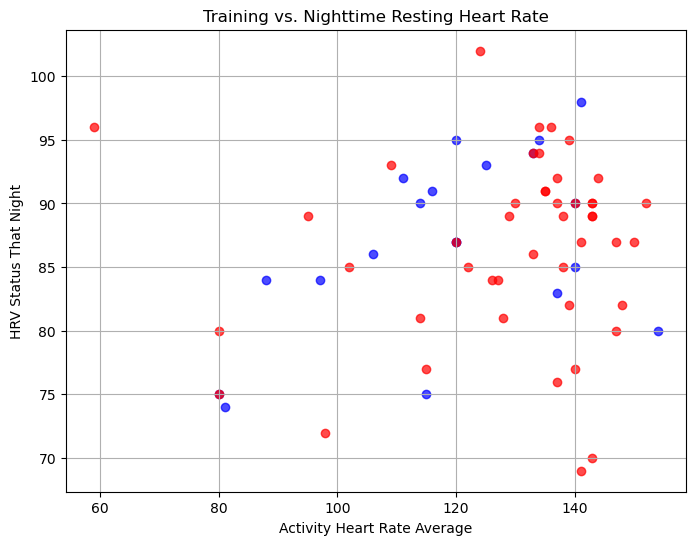

In [524]:
import matplotlib.pyplot as plt

result = filtered[
    (filtered["sleep_duration_needed_delta"].abs() < 1000) &
    (filtered["activity_calories"].notna())
]
plt.figure(figsize=(8, 6))
plt.scatter(
    result['activity_heart_rate_average'],
    result['sleep_hrv_status'],
    alpha=0.7,
    color='blue'
)
result = df_combined[
    (df_combined["sleep_duration_needed_delta"].abs() < 1000) &
    (df_combined["activity_calories"].notna()) &
    (df_combined["activity_duration_diff_activity_to_sleep_activity_duration_seconds"] >= 4 * 60 * 60)
]

plt.scatter(
    result['activity_heart_rate_average'],
    result['sleep_hrv_status'],
    alpha=0.7,
    color='red'
)
plt.xlabel('Activity Heart Rate Average')
plt.ylabel('HRV Status That Night')

plt.title('Training vs. Nighttime Resting Heart Rate')
plt.grid(True)
plt.show()


/var/folders/cp/r09cdjsd4hzc7p8vtlkxw48h0000gn/T/ipykernel_9401/2910009427.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


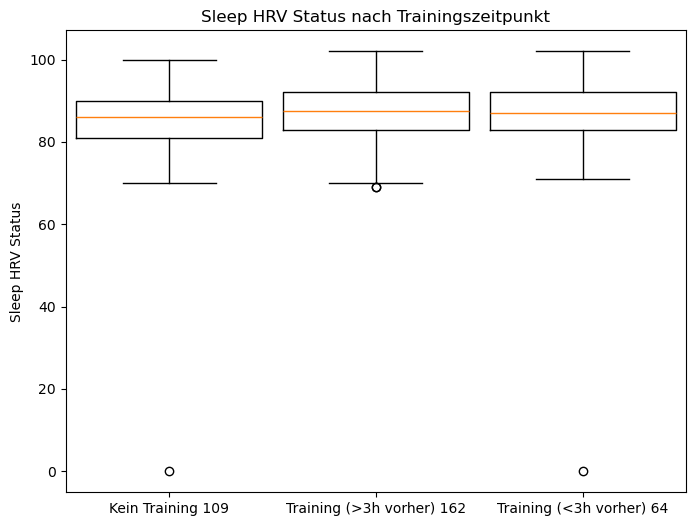

In [486]:

filtered_df_combined = df_combined.where(df_combined["sleep_duration_needed_delta"].abs() < 10000)

filtered_df_combined['training_this_day'] = filtered_df_combined['activity_calories'].notna()
filtered_df_combined['training_2h_before_sleep'] = (
    (filtered_df_combined['training_this_day']) &
    (filtered_df_combined['activity_duration_diff_activity_to_sleep_activity_duration_seconds'] < 4 * 60 * 60) &
    (filtered_df_combined['activity_duration_diff_activity_to_sleep_activity_duration_seconds'] > 0) 
)

group_no_training = filtered_df_combined[~filtered_df_combined['training_this_day']]['sleep_hrv_status']
group_training_2h_before_sleep = filtered_df_combined[filtered_df_combined['training_2h_before_sleep']]['sleep_hrv_status']
group_training_more_than_2h = filtered_df_combined[
    filtered_df_combined['training_this_day'] & ~filtered_df_combined['training_2h_before_sleep'] & (filtered_df_combined['activity_duration_diff_activity_to_sleep_activity_duration_seconds'] > 0)
]['sleep_hrv_status']


plt.figure(figsize=(8, 6))
plt.boxplot(
    [group_no_training.dropna(), group_training_more_than_2h.dropna(),
     group_training_2h_before_sleep.dropna()],
    labels=['Kein Training ' + str(len(group_no_training.dropna())), 'Training (>3h vorher) ' + str(len(
        group_training_more_than_2h.dropna())), 'Training (<3h vorher) ' + str(len(group_training_2h_before_sleep.dropna()))], widths=0.9
)

plt.ylabel('Sleep HRV Status')

plt.title('Sleep HRV Status nach Trainingszeitpunkt')
plt.show()

In [361]:
import pandas as pd

# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Prevent truncation of column content
pd.set_option('display.max_colwidth', None)

# Optional: prevent line wrapping for wide tables
pd.set_option('display.expand_frame_repr', False)

# Now display your DataFrame
filtered  # or use print(df_combined) if needed
len(filtered)




13